In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uber.csv")
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [3]:
f = df[["fare_amount", "pickup_datetime", "pickup_longitude",
         "pickup_latitude", "dropoff_longitude", "dropoff_latitude",
         "passenger_count"]]
df = df.dropna()

In [4]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")
df["hour"] = df["pickup_datetime"].dt.hour
df["day"] = df["pickup_datetime"].dt.day
df["month"] = df["pickup_datetime"].dt.month

In [5]:
df = df[(df["fare_amount"] > 0) & (df["fare_amount"] < 100)]
df = df[(df["passenger_count"] > 0) & (df["passenger_count"] <= 6)]

In [6]:
def distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

df["distance"] = distance(df["pickup_latitude"], df["pickup_longitude"],
                          df["dropoff_latitude"], df["dropoff_longitude"])

In [7]:
df = df[(df["distance"] > 0) & (df["distance"] < 5)]

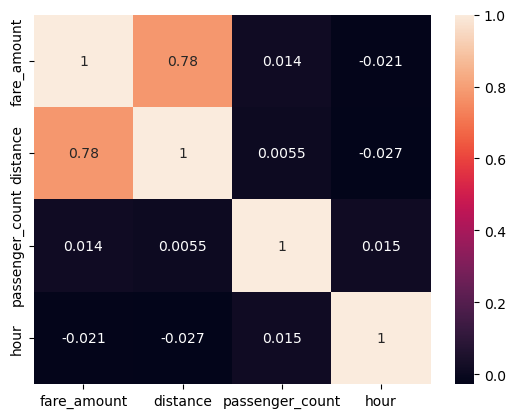

In [8]:
corr = df[["fare_amount", "distance", "passenger_count", "hour"]].corr()
sns.heatmap(corr, annot=True)
plt.show()


In [9]:
X = df[["distance", "passenger_count", "hour"]]  # features
y = df["fare_amount"]                             # target value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# --- Linear Regression model ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [11]:
#--- Random Forest model ---
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [12]:
def evaluate(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model_name}: R2 = {r2:.3f}, RMSE = {rmse:.3f}")

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)

Linear Regression: R2 = 0.588, RMSE = 5.990
Random Forest: R2 = 0.774, RMSE = 4.435


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
